# Barnsley Fern
Michael Barnsley is a British mathematician and UW-Madison alumn who has studied fractals. His fern is a self-similar set that can be mathematically generated at any scale by iterating over a set of functions many times. This example reproduces the fern [as described on Wikipedia](https://en.wikipedia.org/wiki/Barnsley_fern), using some simple functions written in Python, and a random number generator from Numpy.

#### import numpy and matplotlib, so we can view the fern

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# turn on plotting within the Notebook
% matplotlib inline 

## Set up the random number generation
* the fern is constructed by four transform functions, which have different probabilities of being executed. For example, the second transform is chosen 85% of the time, while the first is only chosen 1% of the time.

#### The first step is to create a list of length 100, with values representing the transforms, proportional in number to the probability of the transform

In [2]:
transform_probs = {0: 0.01, 1: 0.85, 2: 0.07, 3: 0.07}

transforms = []
for k, v in transform_probs.items():
    transforms += [k] * int(100 * v)
print(transforms)

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3]


#### We can then use the `numpy.random.choice()` method to randomly sample this list

In [3]:
for i in range(100):
    print(np.random.choice(transforms), end=' ')

1 1 2 1 1 1 3 1 3 3 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 3 1 1 3 1 1 2 2 1 1 1 1 3 1 2 1 1 1 1 1 1 1 1 1 1 3 1 0 1 1 1 1 1 3 1 1 1 2 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 3 1 

## Set up the transform functions
Each function takes pre-defined $x$ and $y$ vectors, and an iteration number $n$, and assigns values to those vectors at the $n$ and $n+1$ positions.

Next we put the transform functions in a dictionary keyed by their numbers, so that they can be chosen using values sampled from the transform probability list above.

In [23]:
def transform1(x, y, n):
    x[n+1] = 0
    y[n+1] = 0.16 * y[n]
    
def transform2(x, y, n):
    x[n+1] = 0.85 * x[n] + 0.04 * y[n]
    y[n+1] = -0.04 * x[n] + 0.85 * y[n] + 1.6
    
def transform3(x, y, n):
    x[n+1] = 0.2 * x[n] - 0.26 * y[n]
    y[n+1] = 0.23 * x[n] + 0.22 * y[n] + 1.6

def transform4(x, y, n):
    x[n+1] = -0.15 * x[n] + 0.28 * y[n]
    y[n+1] = 0.26 * x[n] + 0.24 * y[n] + 0.44
    
transform = {0: transform1, 1: transform2, 2: transform3, 3: transform4}

## Apply the transforms

In [26]:
ni = 1000000 # number of iterations
x = np.zeros(ni) # vector of x-values, one for each iteration
y = np.zeros(ni) # vector of y values

# for each iteration from n to ni-1
for n in range(ni-1):
    # draw a transform number
    choice = np.random.choice(transforms)
    # use the transform number to execute a transform from the dictionary made above
    transform[choice](x, y, n)

## Make a scatter plot of the generated points

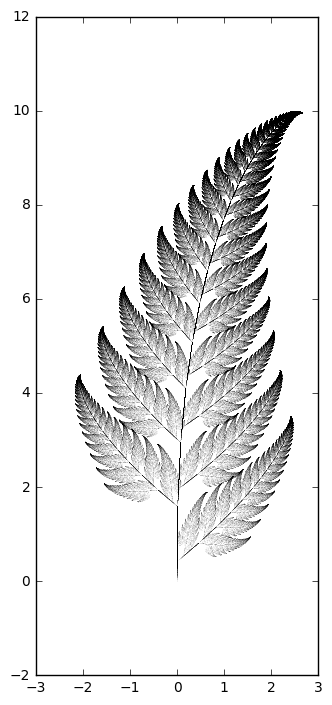

In [27]:
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.scatter(x, y, s=.01, c='k', lw=0)
ax.set_aspect(1)